In [1]:
## for eda and visuls:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno 
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib 

import joblib
import pickle

In [2]:
df=pd.read_csv("./dataSource/Rent_All_Cities_Cleaned.csv")


df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [3]:
df.drop_duplicates(inplace = True)
df.shape

(107613, 10)

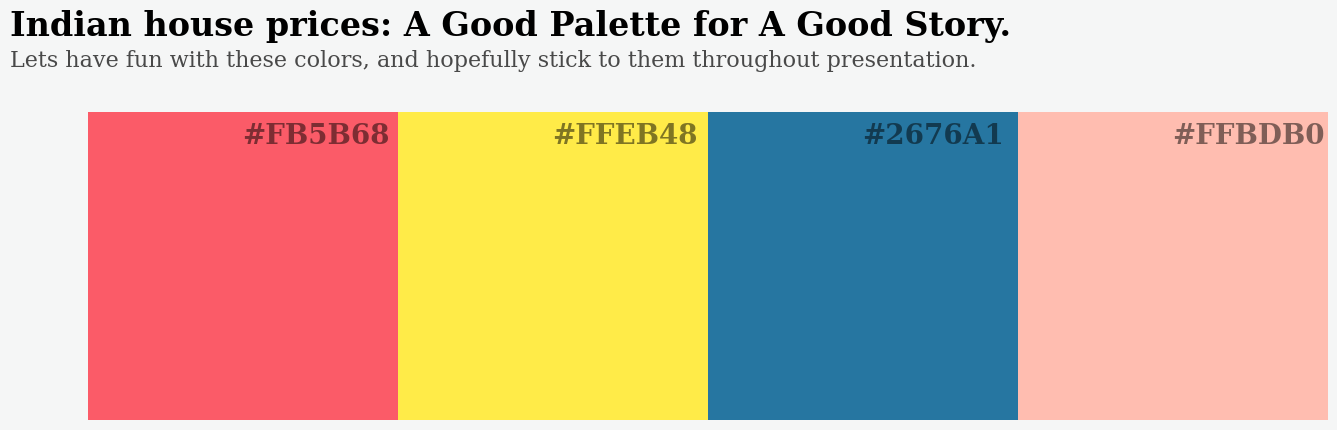

In [4]:
# color palette

#black  '#1F0C07',
#light pink '#FA74BF'

colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("",colors)


sns.palplot(colors, size = 4)
plt.text(-0.75,-0.75, 'Indian house prices: A Good Palette for A Good Story.',{'font':'serif', 'size':24, 'weight':'bold'})
plt.text(-0.75,-0.65, 'Lets have fun with these colors, and hopefully stick to them throughout presentation.',{'font':'serif', 'size':16},alpha = 0.7)
for idx,values in enumerate(colors):
    plt.text(idx,-0.40, colors[idx],{'font':'serif', 'size':20, 'weight':'bold'}, alpha = 0.5)
plt.gcf().set_facecolor('#f5f6f6')
plt.box(None)
plt.axis('off')
plt.show()

In [5]:
des_stats = df.describe(exclude = ['object']).drop(index = ['count'], axis = 0).T
skew = []
kurt = []
num_cols = df.select_dtypes(exclude = ['object']).columns
for col in num_cols:
    skew.append(df[col].skew().round(1))
    kurt.append(df[col].kurt().round(1))

stats = pd.DataFrame({'skew':skew,'kurt':kurt}, index = num_cols)

all_stats = pd.merge(left = des_stats,right = stats, left_index = True, right_index = True)

In [6]:
sx = df.describe(exclude = ['int64', 'float64','float']).drop(index = ['count'], axis = 0).T
sx

,unique,top,freq
seller_type,3,AGENT,79156
layout_type,2,BHK,102280
property_type,6,Apartment,74162
locality,4146,Thane West,1925
furnish_type,3,Semi-Furnished,53521
city,8,Mumbai,32663


C:\Users\janis\AppData\Local\Temp\ipykernel_11076\2692410558.py:35: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot( df['price'], ax = ax3, palette= [colors[0]])
C:\Users\janis\AppData\Local\Temp\ipykernel_11076\2692410558.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


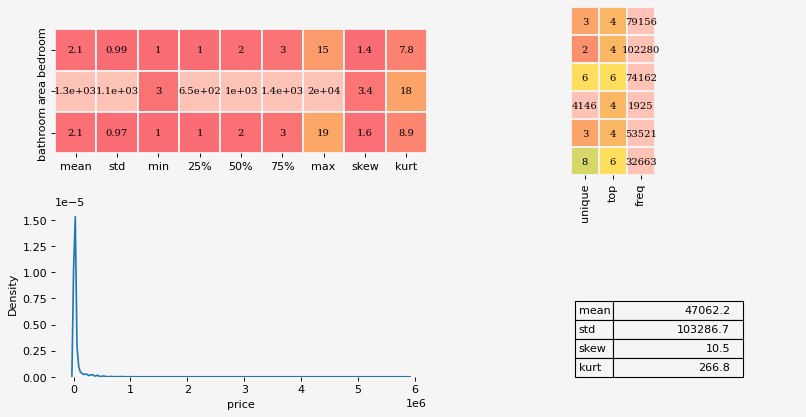

In [7]:
fig = plt.figure(figsize =(12,6), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')

gs = fig.add_gridspec(2,2)
gs.update(wspace = 0, hspace = 0.2)

back_ground = '#f6f5f5'
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])

axes = [ax1,ax2, ax3]

for ax in axes:
    for loc in ['left','right','top','bottom']:
        ax.spines[loc].set_visible(False)
    ax.set_facecolor('#f6f5f5')
    

#colormap for visualization
colormap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


#### statistics of numerical features 
sns.heatmap(all_stats.drop(index = ['price']),
            annot = True, ax = ax1, 
            vmin = -0, vmax = 120,
            square = True, linewidths = 0.09,linecolor = '#f6f5f5',
            cbar = False,
            cmap =colormap, annot_kws={'font':'serif', 'size':9, 'weight':'normal', 'color':'black'}, alpha = 0.9)

#### statistics of target
#ax4 = ax2.twinx()
sns.kdeplot( df['price'], ax = ax3, palette= [colors[0]])

sx = df.describe(exclude = ['int64', 'float64','float']).drop(index = ['count'], axis = 0).T
sx['top']= ['4', '4', '6','4','4','6']
sx = sx.astype(int)

sns.heatmap(sx,annot = True,fmt = '1.0f',vmin = -0, vmax = 20,ax = ax2,
            square = True, linewidths = 0.09,cbar = False,linecolor = '#f6f5f5',
            cmap =colormap, annot_kws={'font':'serif', 'size':9, 'weight':'normal', 'color':'black'}, alpha =0.9)

## labeling stats in violin plot
pr = df['price'].describe().drop(index = ['count', 'mean','std'], axis = 0)
 


ax2.axes.get_yaxis().set_visible(False)

### price stats table
price_stats = all_stats.T['price'].to_frame().round(1)
price_stats = (price_stats.T[['mean', 'std', 'skew', 'kurt']]).T
bbox = [0.5, 0, 0.35, 0.45]
ax4.table(cellText = price_stats.values, rowLabels = price_stats.index, 
          bbox=bbox,cellColours = np.array(['#f6f5f5','#f6f5f5','#f6f5f5','#f6f5f5']).reshape(-1,1),
          rowColours = ['#f6f5f5','#f6f5f5','#f6f5f5','#f6f5f5'])

ax4.axis('off')




fig.show()

Text(0.1, 0.9, 'Most of the houses are of Two bedrooms and Two bathrooms \n As we can see there is so much outliers present in price and area columns:')

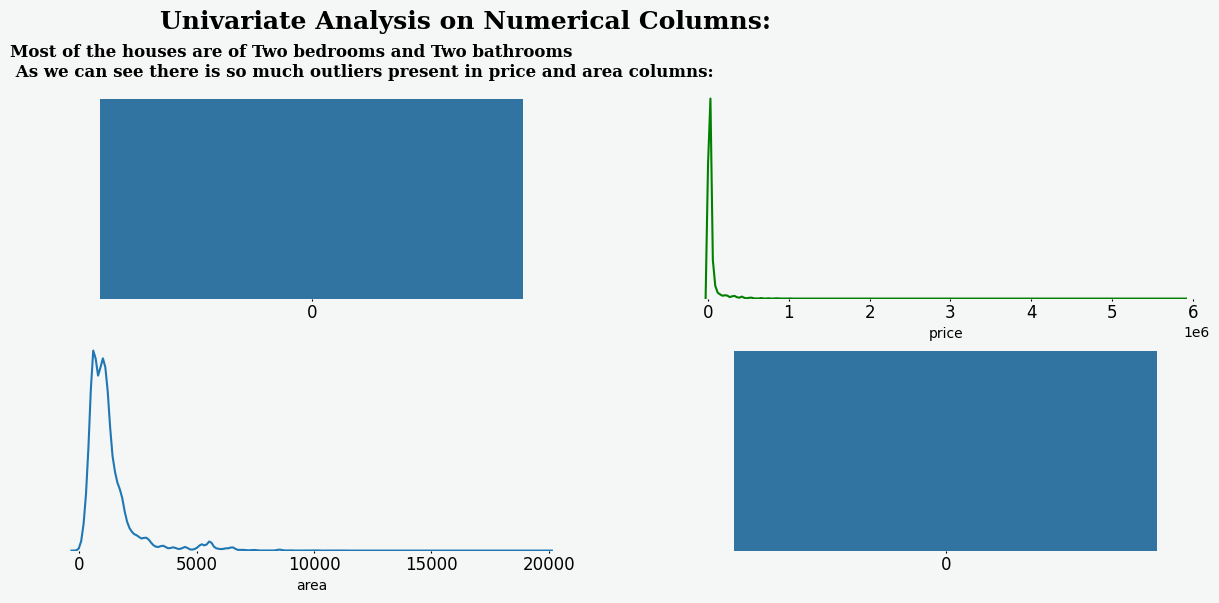

In [8]:
fig =  plt.figure(figsize = (15,6))
fig.patch.set_facecolor('#f5f6f6')


                                                   
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.2,hspace= 0.2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

axes=[ax0,ax1,ax2,ax3]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x',
                   labelsize = 12, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1.5)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)


        
cols = df.select_dtypes(exclude = 'object').columns

sns.countplot(df[cols[0]],ax=ax0)
sns.kdeplot(x = df[cols[1]],color="green",ax = ax1)
sns.kdeplot(x = df[cols[2]],ax = ax2)
sns.countplot(df[cols[3]],ax=ax3)

fig.text(0.2,0.98,"Univariate Analysis on Numerical Columns:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"Most of the houses are of Two bedrooms and Two bathrooms \n As we can see there is so much outliers present in price and area columns:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)

C:\Users\janis\AppData\Local\Temp\ipykernel_11076\2625591574.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\janis\AppData\Local\Temp\ipykernel_11076\2625591574.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\janis\AppData\Local\Temp\ipykernel_11076\2625591574.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
C:\Users\janis\AppData\Local\Temp\ipykernel_11076\2625591574.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[col].value_counts().index 

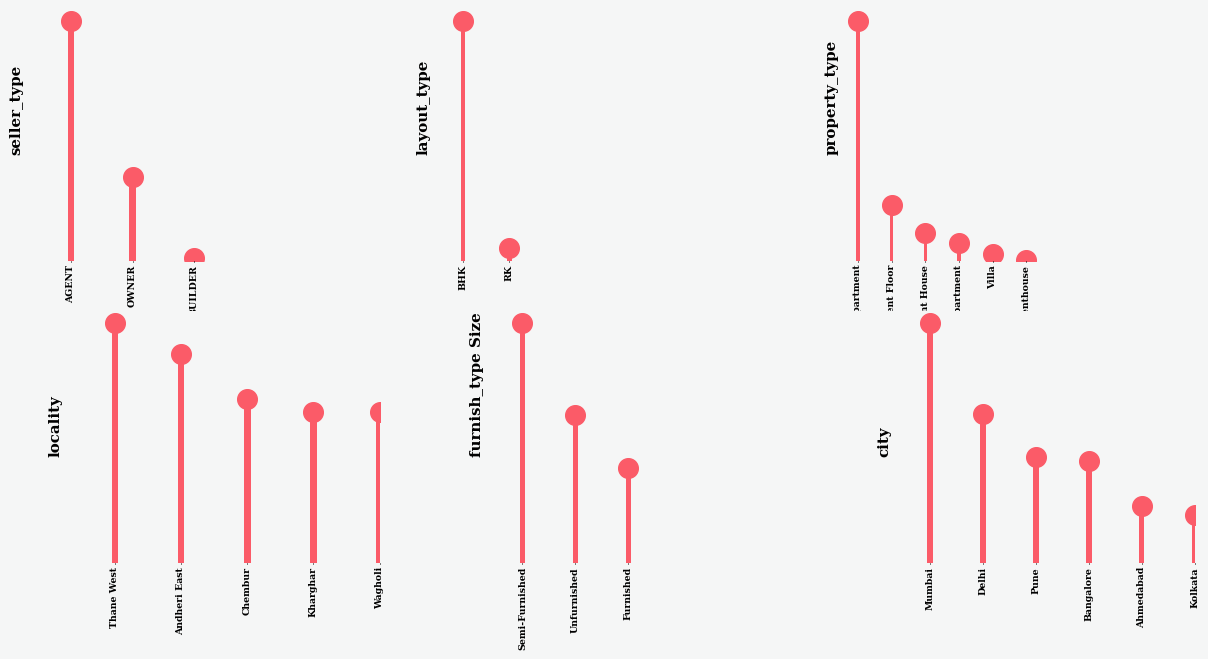

In [9]:
### univariate ananalysis


fig =  plt.figure(figsize = (17,8), dpi = 90)
fig.patch.set_facecolor('#f5f6f6')


                                                    ##### Note to reader I could have used subplots feature, but going with grid
                                                           #spec for more controlover plots
gs = fig.add_gridspec(2,3)
gs.update(wspace =0.1,hspace = 0.2)


ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])

ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])




axes = [ax0,ax1,ax2,ax3, ax4,ax5,]


for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x',
                   labelsize = 1, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(True)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
        
cols = df.select_dtypes(exclude = ['int64','float64','float']).columns
labels = ['seller_type', 'layout_type', 'property_type', 'locality', 'furnish_type Size', 'city']





### ax0- carat
s = 250

for col,ax,label in zip(cols,axes,labels):
    ax.bar(x = df[col].value_counts().index, height = df[col].value_counts().values, width = 0.1, color = colors[0] )
    ax.scatter(x = df[col].value_counts().index, y = df[col].value_counts().values, s = s,color = colors[0] )
    ht = df[col].value_counts().values.max()
    ax.text(-1,ht/2.2 ,label,**{'font':'serif', 'size':12, 'weight':'bold', 'rotation' : 'vertical'}, alpha = 1)
    ax.set_xticklabels(df[col].value_counts().index , rotation = 90,**{'font':'serif', 'size':7.5, 'weight':'bold'}, alpha = 1)
    
    
    

        
ax0.set_xlim(-1,5)
ax1.set_xlim(-1,7)
ax2.set_xlim(-1,10)
ax3.set_xlim(-1.6,4)
ax4.set_xlim(-2,5)
ax5.set_xlim(-2,5)








fig.show()

C:\Users\janis\AppData\Local\Temp\ipykernel_11076\1949006619.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
C:\Users\janis\AppData\Local\Temp\ipykernel_11076\1949006619.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
C:\Users\janis\AppData\Local\Temp\ipykernel_11076\1949006619.py:1: FutureWarning: The default value of numeric_only in DataF

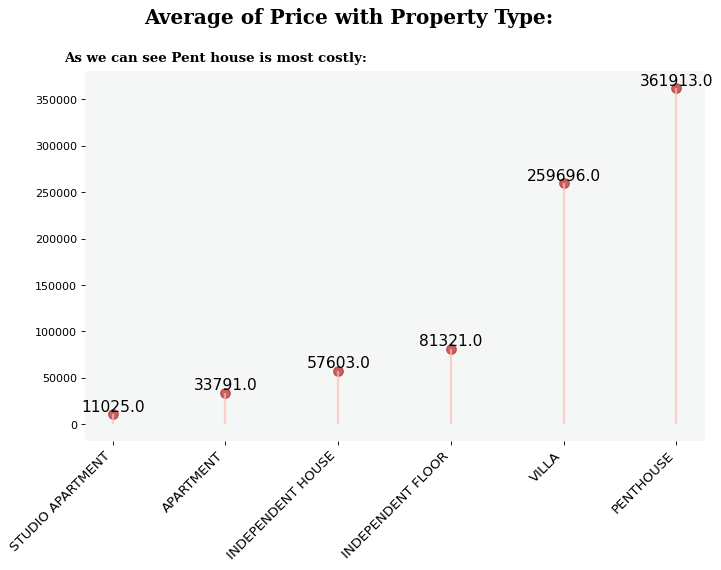

In [10]:
df1=round(df[['price', 'property_type']].groupby('property_type').apply(lambda x: x.mean()))
df1.sort_values('price',inplace=True)
df1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=df1.index,ymin=0,ymax=df1.price,color = colors[3],alpha=0.7,linewidth=2)
ax.scatter(x=df1.index, y=df1.price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
#ax.set_title('Average of Property Type With Price', fontdict={'size':22})

ax.set_xticks(df1.index)
ax.set_xticklabels(df1.property_type.str.upper(), rotation=45, fontdict={'horizontalalignment': 'right', 'size':12})

ax.set_facecolor('#f5f6f6')
for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)
for row in df1.itertuples():
    ax.text(row.Index, row.price+.5, s=round(row.price, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

fig.text(0.2,0.98,"Average of Price with Property Type:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"As we can see Pent house is most costly:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)

plt.show()

In [11]:
df["price"]=np.log(df["price"])
df["area"]=np.log(df["area"])

<Axes: xlabel='price', ylabel='Density'>

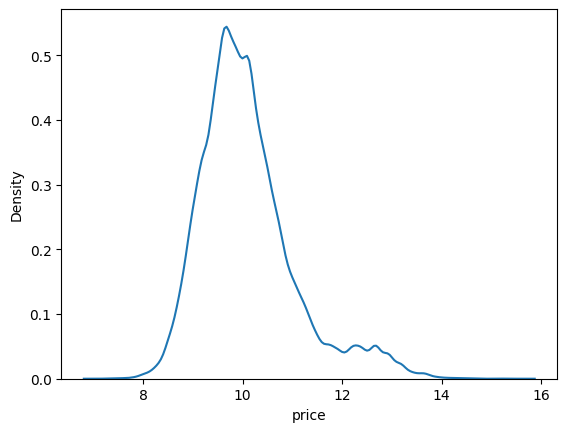

In [12]:
sns.kdeplot(df["price"])

In [13]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,9.903488,7.279319,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,8.902456,5.347108,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,9.998798,7.549609,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,9.472705,7.158514,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,9.798127,7.377759,Furnished,2.0,Ahmedabad


In [14]:
df["seller_type"]=df["seller_type"].map({'OWNER':0,'AGENT':1,'BUILDER':2})
df["layout_type"]=df["layout_type"].map({'BHK':0,'RK':1})
df["property_type"]=df["property_type"].map({'Apartment':0,'Studio Apartment':1,'Independent House':2,'Independent Floor':3,'Villa':4,'Penthouse':5})
df["furnish_type"]=df["furnish_type"].map({'Furnished':0,'Semi-Furnished':1,'Unfurnished':2})
df["city"]=df["city"].map({'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6,'Pune':7})

In [15]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,0,2.0,0,0,Bodakdev,9.903488,7.279319,0,2.0,0
1,0,1.0,1,1,CG Road,8.902456,5.347108,1,1.0,0
2,0,3.0,0,0,Jodhpur,9.998798,7.549609,2,3.0,0
3,0,2.0,0,2,Sanand,9.472705,7.158514,1,2.0,0
4,0,2.0,0,2,Navrangpura,9.798127,7.377759,0,2.0,0


In [16]:
X = df[['seller_type','bedroom','layout_type','property_type','locality','area','furnish_type','bathroom','city']]
X
y = df['price']

X.head()

X["furnish_type"].unique()


array([0, 1, 2], dtype=int64)

In [17]:
# Converting CATEGORICAL COLUMNS to NUMERICAL COLUMNS
# Location is a nominal variable. But since there are a lot of unique values, we will be using OrdinalEncoder
# CATEGORICAL_COLUMNS = ds['Location']
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder()
# for col in CATEGORICAL_COLUMNS:
# X['seller_type'] = ord.fit_transform(X[['seller_type']])
# X['layout_type'] = ord.fit_transform(X[['layout_type']])
# X['property_type'] = ord.fit_transform(X[['property_type']])
X['locality'] = ord.fit_transform(X[['locality']])
# X['furnish_type'] = ord.fit_transform(X[['furnish_type']])
# X['city'] = ord.fit_transform(X[['city']])

# columns_to_encode = ['seller_type', 'layout_type','property_type','locality','furnish_type','city']


# ord.fit(X[columns_to_encode])

# X[columns_to_encode] = ord.transform(X[columns_to_encode])


# joblib.dump(ord, 'rent_ordinal_encoding.joblib')
# joblib.dump(ord, 'rent_test_ordinal_encoding.joblib')
joblib.dump(ord, 'newtestencoder.joblib')

X.head()

,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom,city
0,0,2.0,0,0,567.0,7.279319,0,2.0,0
1,0,1.0,1,1,633.0,5.347108,1,1.0,0
2,0,3.0,0,0,1481.0,7.549609,2,3.0,0
3,0,2.0,0,2,3053.0,7.158514,1,2.0,0
4,0,2.0,0,2,2433.0,7.377759,0,2.0,0


In [18]:
X["seller_type"].unique()

array([0, 1, 2], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [21]:
print(X_train.shape)
print(X_test.shape)


(86090, 9)
(21523, 9)


In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
model.score(X_test,y_test)

0.890214250934881

In [24]:
pickle.dump(model,open('rent_model.pkl','wb'))

In [25]:
inp = pd.DataFrame({
    'seller_type': [1.0],
    'bedroom' : [2.0],
    'layout_type' :  [1.0],
    'property_type': [1.0],
    'locality': [1.0] ,
    'area':[6.2],
    'furnish_type': [1.0],
    'bathroom' : [2],
    'city': [1.0]
})

# output = model.predict(input_data)
# print(output)

ttt = (model.predict(inp))

ttt

# print(np.exp(ttt))
# ttt

array([8.91132163])

In [26]:
encoder = joblib.load('newtestencoder.joblib')

def transform(new_df):
#     new_df['area'] = np.log(new_df['area'])
#     new_df['seller_type'] = encoder.transform(new_df[['seller_type']])
#     new_df['layout_type'] = encoder.transform(new_df[['layout_type']])
#     new_df['property_type'] = encoder.transform(new_df[['property_type']])
#     new_df['locality'] = encoder.transform(new_df[['locality']])
#     new_df['furnish_type'] = encoder.transform(new_df[['furnish_type']])
#     new_df['city'] = encoder.transform(new_df[['city']])

#     new_data_encoded = encoder.transform(new_df[['seller_type', 'layout_type','property_type','locality','furnish_type','city']])
#     new_data = encoder.transform(new_df[['seller_type', 'layout_type','property_type','locality','furnish_type','city']])
    
#     new_df['city'] = encoder.transform(new_df[['city']])
#     new_df['furnish_type'] = encoder.transform(new_df[['furnish_type']])
#     new_df['layout_type'] = encoder.transform(new_df[['layout_type']])
#     new_df['locality'] = encoder.transform(new_df[['locality']])
#     new_df['property_type'] = encoder.transform(new_df[['property_type']])
#     new_df['seller_type'] = encoder.transform(new_df[['seller_type']])

#     new_data = encoder.transform(new_df[['locality']])


    return new_data_encoded



In [30]:
newinp = pd.DataFrame({
    'seller_type': 'OWNER',
    'bedroom' : [2.0],
    'layout_type' : 'BHK',
    'property_type': 'Studio Apartment',
    'locality':'Bodakdev' ,
    'area':[3400.2],
    'furnish_type': 'Furnished',
    'bathroom' : [2.0],
    'city': 'Mumbai'
})

# final_data = transform(newinp)
# final_data

ssss = encoding(newinp)

print(model.predict(ssss))
ssss


# output = model.predict(final_data)
# print(output)


[12.98383346]


,seller_type,bedroom,layout_type,property_type,locality,area,furnish_type,bathroom,city
0,0,2.0,0,1,567.0,3400.2,0,2.0,6


In [28]:

def encoding(df):
    df["seller_type"]=df["seller_type"].map({'OWNER':0,'AGENT':1,'BUILDER':2})
    df["layout_type"]=df["layout_type"].map({'BHK':0,'RK':1})
    df["property_type"]=df["property_type"].map({'Apartment':0,'Studio Apartment':1,'Independent House':2,'Independent Floor':3,'Villa':4,'Penthouse':5})
    df["furnish_type"]=df["furnish_type"].map({'Furnished':0,'Semi-Furnished':1,'Unfurnished':2})
    df["city"]=df["city"].map({'Ahmedabad':0,'Bangalore':1,'Chennai':2,'Delhi':3,'Hyderabad':4,'Kolkata':5,'Mumbai':6,'Pune':7})
    df['locality'] = encoder.transform(df[['locality']])
    return df
